#**RNN - Recurrent Neural Network**

**What will you learn?**
1. **Introduction** : Why RNN?
2. **Recurrent Neural Network vs. Feedforward Neural Network** : Comparison
3. **Problems in RNN** : Exploding and Vanishing Gradients
4. **How RNN works?**
5. **Structures** : Various structures to form RNN model
6. **Applications of RNN**
7. **Implementation**
8. **Variant RNN Architecture** : BRNN, LSTM, GRU
9. **Advantages and Disadvantages**

##**Introduction**

Currently, we are only equipped with handling the data where there is some specific size of input and output. We are not equipped to handle data which has some sequence to it.

For example, if we want to produce a coherent sentence. 

The point to be noted here is that, in any language, a coherent sentence isn't just a bunch of words thrown in together, it actually has to make some sense. So we need to train our model with a huge corpus (dataset) and provide it some seed word. The model is then tasked with creating a coherent sentence using that seed word.

So basically, we need some model which learns how to use:
1. a variable sized input,
2. a variable sized output 
3. with data which has a sequence nature to it.

This is where RNN comes into the picture.

**Recurrent Neural Network(RNN)** are a type of Neural Network where the output from previous step are fed as input to the current step using time series data. In traditional neural networks, all the inputs and outputs are independent of each other, but in cases like when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words.

These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning; they are incorporated into popular applications such as Siri, voice search, and Google Translate. Like feedforward and Convolutional Neural Networks (CNNs), recurrent neural networks utilize training data to learn. They are distinguished by their “memory” as they take information from prior inputs to influence the current input and output. While traditional deep neural networks assume that inputs and outputs are independent of each other, the output of recurrent neural networks depend on the prior elements within the sequence. While future events would also be helpful in determining the output of a given sequence, unidirectional recurrent neural networks cannot account for these events in their predictions.

##**Recurrent Neural Network vs. Feedforward Neural Network**

<img src = "https://files.codingninjas.in/rnn1-7692.jpg" width = 800>

Let’s take an idiom, such as “feeling under the weather”, which is commonly used when someone is ill, to aid us in the explanation of RNNs. In order for the idiom to make sense, it needs to be expressed in that specific order. As a result, recurrent networks need to account for the position of each word in the idiom and they use that information to predict the next word in the sequence.

Looking at the visual below, the “rolled” visual of the RNN represents the whole neural network, or rather the entire predicted phrase, like “feeling under the weather.” The “unrolled” visual represents the individual layers, or time steps, of the neural network. Each layer maps to a single word in that phrase, such as “weather”. Prior inputs, such as “feeling” and “under”, would be represented as a hidden state in the third timestep to predict the output in the sequence, “the”.

<img src = "https://files.codingninjas.in/rnn2-7693.jpg" width = 800>

Another distinguishing characteristic of recurrent networks is that they share parameters across each layer of the network. While feedforward networks have different weights across each node, recurrent neural networks share the same weight parameter within each layer of the network. That said, these weights are still adjusted in the through the processes of backpropagation and gradient descent to facilitate reinforcement learning.

Recurrent neural networks leverage backpropagation through time (BPTT) algorithm to determine the gradients, which is slightly different from traditional backpropagation as it is specific to sequence data. The principles of BPTT are the same as traditional backpropagation, where the model trains itself by calculating errors from its output layer to its input layer. These calculations allow us to adjust and fit the parameters of the model appropriately. BPTT differs from the traditional approach in that BPTT sums errors at each time step whereas feedforward networks do not need to sum errors as they do not share parameters across each layer.

##**Problem in RNN**

Through this process, RNNs tend to run into two problems, known as exploding gradients and vanishing gradients. These issues are defined by the size of the gradient, which is the slope of the loss function along the error curve. When the gradient is too small, it continues to become smaller, updating the weight parameters until they become insignificant—i.e. 0. When that occurs, the algorithm is no longer learning. Exploding gradients occur when the gradient is too large, creating an unstable model. In this case, the model weights will grow too large, and they will eventually be represented as NaN. One solution to these issues is to reduce the number of hidden layers within the neural network, eliminating some of the complexity in the RNN model.

We will discuss more about these in the following lectures.

##**How RNN works?**

They are typically as follows:

<img src = "https://files.codingninjas.in/architecture-rnn-ltr-7694.png" >

For each timestep $t$, the activation $a^{< t >}$ and the output $y^{< t >}$ are expressed as follows:

$$a^{< t >} = g_1( W_{aa}a^{<t-1>} + W_{ax}x^{<t>} + b_a)$$

and 

$$y^{< t >} = g2( W_{ya}a^{<t>} + b_y)$$

where $W_{aa}, W_{ax}, W_{ya}, b_a, b_y$ are coefficients that are shared temporally and $g_1, g_2$ are activation functions.

##**Typical RNN Structure**


<img src = "https://files.codingninjas.in/typical-structure-rnn-7696.jpg" width = 800>

In the above structure $X_1, X_2, X_3$ sequence will be passed through RNN and we would get $Y_1, Y_2, Y_3$.
But we care only about the final output $Y$, not the intermediate outputs.

Although in some cases we would want to have such an architecture, where we need to store the sequential output.

<img src = "https://files.codingninjas.in/archiii-7702.jpg" width = 800>

In above structure, we need the sequence output from RNN1 so that it can become the sequential input given inside RNN2.


##**Applications of RNNs**

RNN models are mostly used in the fields of natural language processing and speech recognition. The different applications are summed up below:


Types of RNN | Illustration | Example
:---|:---|:---
One-to-one $(T_x = T_y = 1)$|<img src = "https://files.codingninjas.in/rnn-one-to-one-ltr-7701.png" width = 500> | Traditional Neural Network
One-to-many $(T_x = 1, T_y > 1)$|<img src = "https://files.codingninjas.in/rnn-one-to-many-ltr-7700.png" width = 500> | Traditional Neural Network
Many-to-one $(T_x > 1, T_y = 1)$|<img src = "	https://files.codingninjas.in/rnn-many-to-one-ltr-7699.png" width = 500> | Sentiment Classification
Many-to-many $(T_x = T_y)$|<img src = "https://files.codingninjas.in/rnn-many-to-many-same-ltr-7698.png" width = 500> | Name Entity Recoginition
Many-to-many $(T_x \neq T_y)$|<img src = "	https://files.codingninjas.in/rnn-many-to-many-different-ltr-7697.png" width = 500> | Machine Translation



##**Lets write the code!**

###**Airline Data Analysis**

We have a dataset which has monthly analysis of number of people who travelled internationally.

We need to predict the number of people who might travel in the upcoming month. Keeping in mind the seasonal trends, we shall keep our window of $X$ to be of 12 months.

We need to keep in mind that $Y_t$ will also become part of $X_{t + 1}$ for calculation of $Y_{t + 1}$

###**Preparing the Data**

We will prepare the testing and training data like we dicussed in the analysis.

In [32]:
from pandas import read_csv 
import numpy as np

In [33]:
df = read_csv('https://files.codingninjas.in/international-airline-passengers-7703.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [34]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [35]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [37]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [38]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [39]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

###**Setting up the Model**

In [48]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [49]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size = 1)

Epoch 1/10
84/84 [==============================] - 1s 2ms/step - loss: 0.1461
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 5/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 8/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 9/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 10/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0070


###**Analysing the Output**

In [50]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

In [51]:
from matplotlib import pyplot as plt

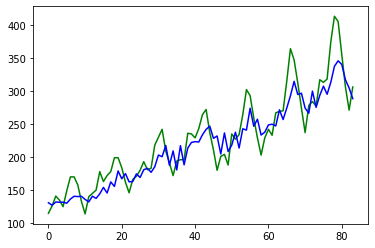

In [52]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

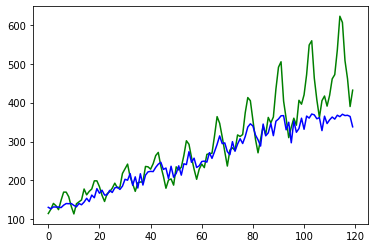

In [53]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()

In [54]:
from sklearn.metrics import r2_score
r2_score(combinedTrue, combinedPredicted)

0.7288946231209112

We are not doing very well in this dataset. Firstly, we have used very less layers and secondly RNN has problems such as exploding and vanishing gradient. In further modules, we will work upon fixing this.

##**Variant RNN Architectures**



###**Bidirectional Recurrent Neural Networks (BRNN)** 


These are a variant network architecture of RNNs. While unidirectional RNNs can only drawn from previous inputs to make predictions about the current state, bidirectional RNNs pull in future data to improve the accuracy of it. If we return to the example of “feeling under the weather” earlier in this article, the model can better predict that the second word in that phrase is “under” if it knew that the last word in the sequence is “weather.”




###**Long Short-Term Memory (LSTM):** 

This is a popular RNN architecture, which was introduced by Sepp Hochreiter and Juergen Schmidhuber as a solution to vanishing gradient problem. In their paper they work to address the problem of long-term dependencies. That is, if the previous state that is influencing the current prediction is not in the recent past, the RNN model may not be able to accurately predict the current state. As an example, let’s say we wanted to predict the italicized words in following, “Alice is allergic to nuts. She can’t eat peanut butter.” The context of a nut allergy can help us anticipate that the food that cannot be eaten contains nuts. However, if that context was a few sentences prior, then it would make it difficult, or even impossible, for the RNN to connect the information. To remedy this, LSTMs have “cells” in the hidden layers of the neural network, which have three gates–an input gate, an output gate, and a forget gate. These gates control the flow of information which is needed to predict the output in the network.  For example, if gender pronouns, such as “she”, was repeated multiple times in prior sentences, you may exclude that from the cell state.



###**Gated Recurrent Units (GRUs):** 


This RNN variant is similar the LSTMs as it also works to address the short-term memory problem of RNN models. Instead of using a “cell state” regulate information, it uses hidden states, and instead of three gates, it has two—a reset gate and an update gate. Similar to the gates within LSTMs, the reset and update gates control how much and which information to retain.

##**Advantages & Disadvantages**

###**Advantages**


1. RNN can process inputs of any length.
2. An RNN model is modeled to remember each information throughout the time which is very helpful in any time series predictor.
3. Even if the input size is larger, the model size does not increase.
4. The weights can be shared across the time steps.
5. RNN can use their internal memory for processing the arbitrary series of inputs which is not the case with feedforward neural networks.

###**Disadvantages**

1. Due to its recurrent nature, the computation is slow.
2. Training of RNN models can be difficult.
3. If we are using relu or tanh as activation functions, it becomes very difficult to process sequences that are very long.
4. Prone to problems such as exploding and gradient vanishing.